# Predicting the price of a car using Regression algorithms

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print ('Imported pandas,numpy and matplotlib')

Imported pandas,numpy and matplotlib


Pandas and numpy will be used for our mathemetical models while matplotlib will be used for plotting.

Let's read our data and visualise it.

In [47]:
# path of data 
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


df.head() will give us the details fo top 5 rows of every column. We can use df.tail() to get the last 5 rows and similiary df.head(10) to  get top 10 rows.

The data is about cars and we need to predict the price of car using the above data

We will be using Linear regression to get the price of the car. Linear regression works on one independent value to predict the value of dependent variable.In this case the independent value can be any coloumn while the predicted value should be price.

Simple Linear Regression
Y=a+bX

In this case a is the intercept value and b is the slope(coef) value

# Lets load the modules for linear regression

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
#Create a linera regression Object
lm = LinearRegression()
lm

LinearRegression()

We will take highway-mpg to check how it effects the price of the car

In [50]:
X = df[['highway-mpg']]
Y = df['price']
lm.fit(X,Y)

LinearRegression()

In [51]:
# we will predict the price of 5 cars 
Yhat=lm.predict(X)
Yhat[0:5]  


array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

find the value of intercept(intercept_) and slope(coef_)

In [52]:
lm.intercept_


38423.3058581574

In [53]:
lm.coef_

array([-821.73337832])

Putting this on equation 


price = 38423.31 - 821.73 x highway-mpg

Now lets check if the value we have received correctly matches with the actual values. How our model is performing will be clear from the graph

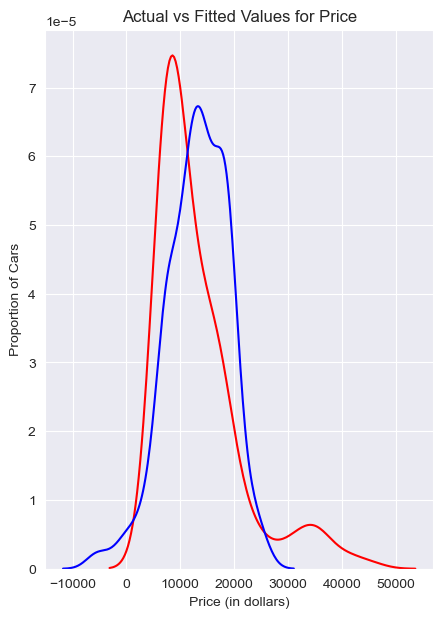

In [54]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.kdeplot(df['price'],  color="r", label="Actual Value")
sns.kdeplot(Yhat, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

The above graph shows the model is not a great fit

(0.0, 48183.340149377625)

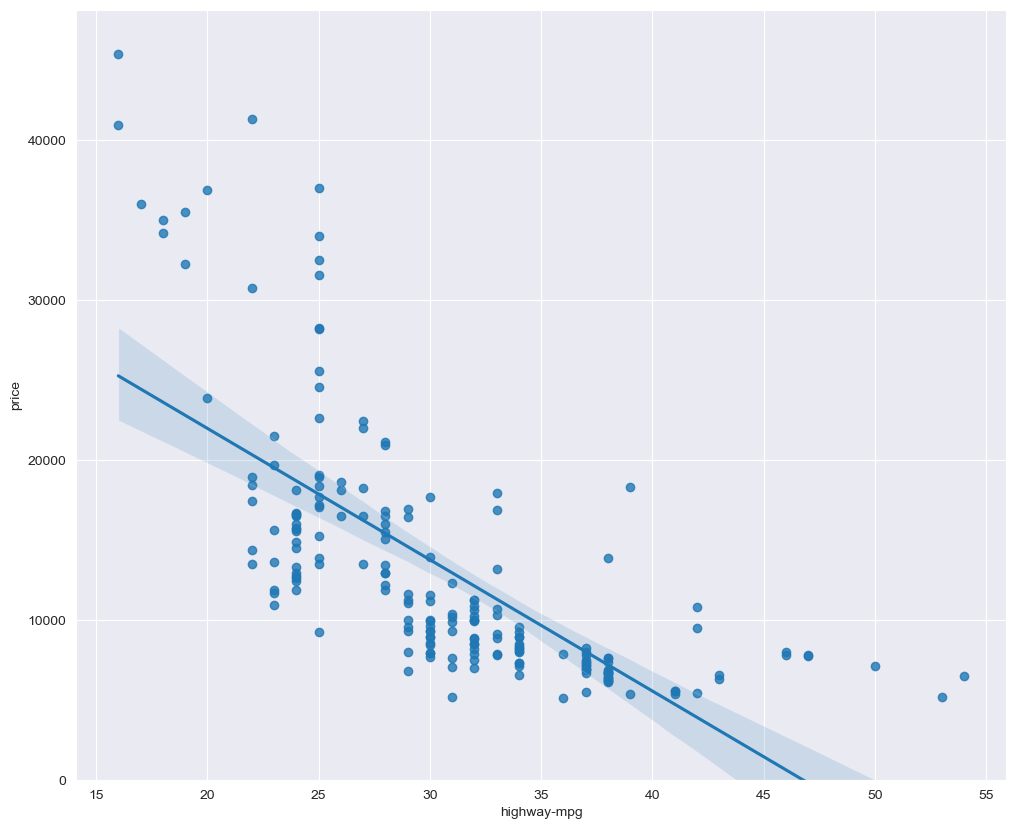

In [55]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

Lets try Linear regression with another value city-mpg

In [56]:
lm1 = LinearRegression()
lm1

LinearRegression()

In [57]:
X1 = df[['city-mpg']]
Y1 = df['price']
lm1.fit(X1,Y1)
Yhat1=lm1.predict(X1)
Yhat1[0:5] 

array([16757.08312743, 16757.08312743, 18455.98957651, 14208.72345381,
       19305.44280105])

In [58]:
#Intercept value and coef value
lm1.intercept_


34595.60084277828

In [59]:
lm1.coef_

array([-849.45322454])

Lets see the graph of the values

(0.0, 48243.459634602346)

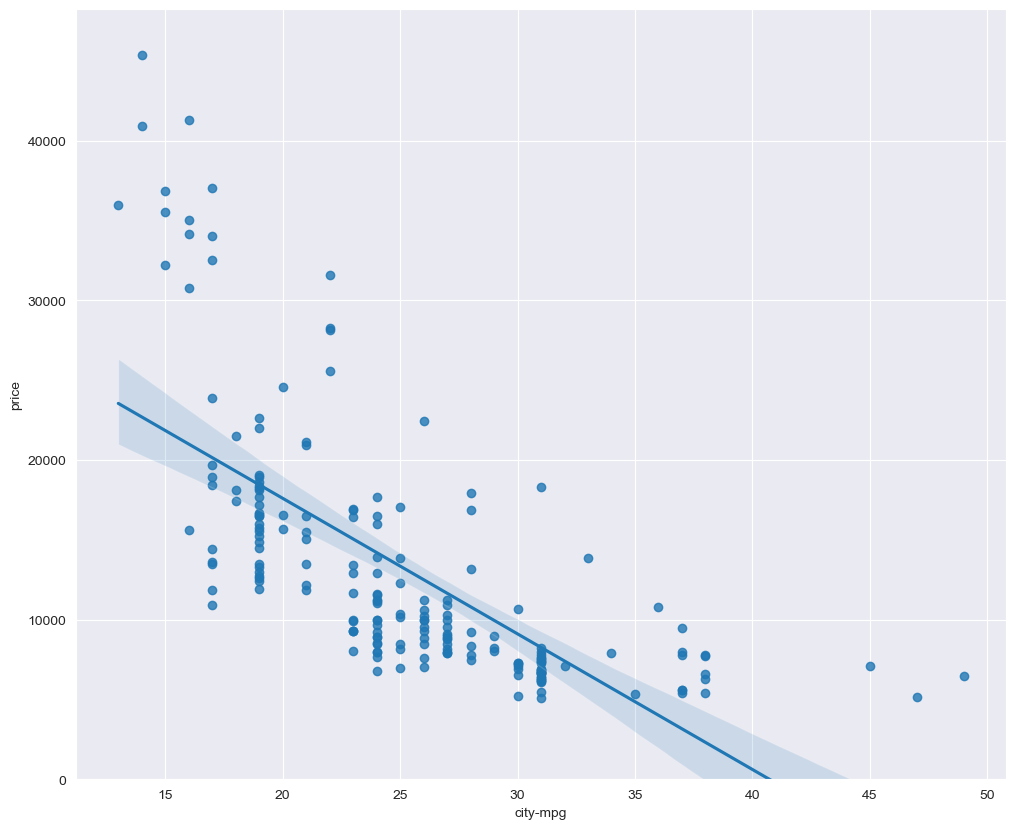

In [60]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="city-mpg", y="price", data=df)
plt.ylim(0,)

Actual and fitted value difference

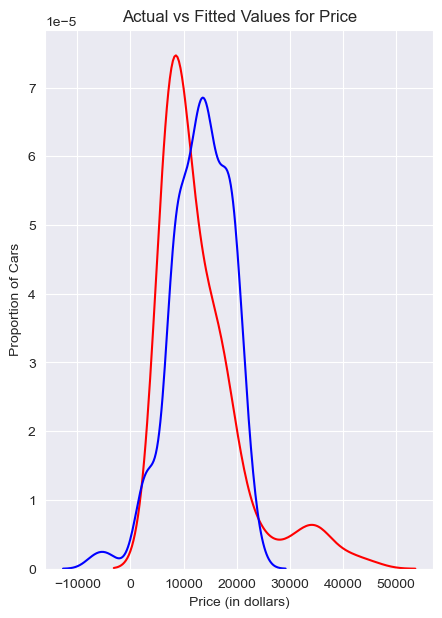

In [61]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax1 = sns.kdeplot(df['price'],  color="r", label="Actual Value")
sns.kdeplot(Yhat1,  color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

The above graph shows city-mpg and highway-mpg has alsmost similar result

Lets see out of the two which is storngly related to the price 

In [62]:
df[["city-mpg","horsepower","highway-mpg","price"]].corr()

,city-mpg,horsepower,highway-mpg,price
city-mpg,1.000000,-0.822214,0.972044,-0.686571
horsepower,-0.822214,1.000000,-0.804575,0.809575
highway-mpg,0.972044,-0.804575,1.000000,-0.704692
price,-0.686571,0.809575,-0.704692,1.000000


As per the figure horsepower is strongly replated. Lets try our model with horsepower value

In [63]:
lm2 = LinearRegression()
lm2

LinearRegression()

In [64]:
X2 = df[['horsepower']]
Y2 = df['price']
lm2.fit(X2,Y2)
Yhat2=lm2.predict(X2)
Yhat2[0:5] 

array([14514.76823442, 14514.76823442, 21918.64247666, 12965.1201372 ,
       15203.50072207])

In [65]:
lm2.coef_

array([172.18312191])

In [66]:
lm2.intercept_

-4597.558297892909

(0.0, 47537.44652775578)

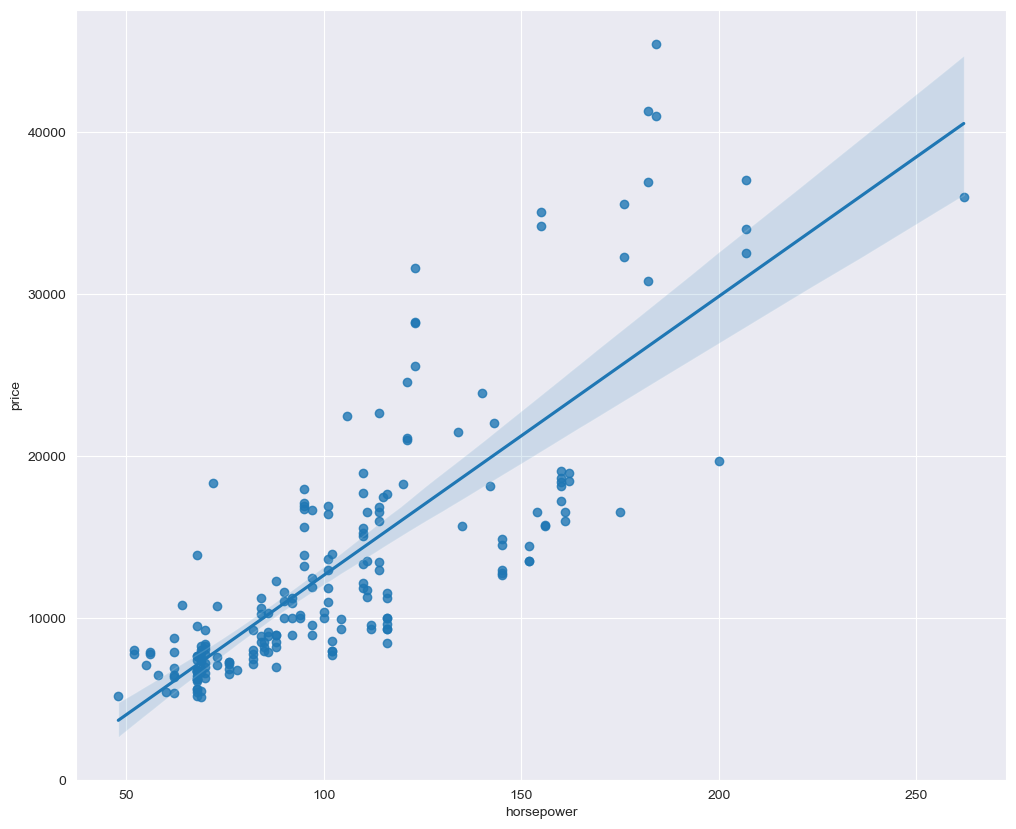

In [67]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="horsepower", y="price", data=df)
plt.ylim(0,)

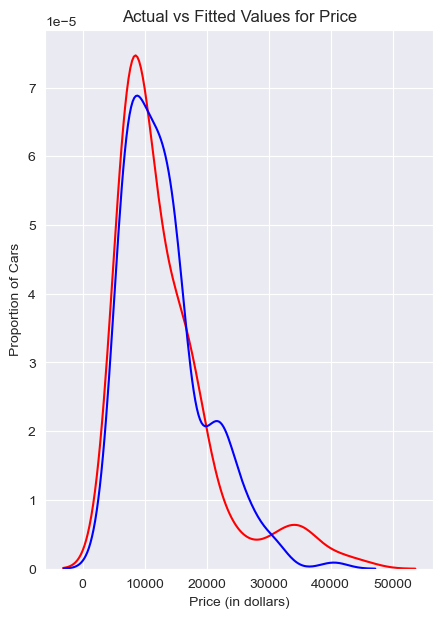

In [68]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax2 = sns.kdeplot(df['price'],  color="r", label="Actual Value")
sns.kdeplot(Yhat2,  color="b", label="Fitted Values" , ax=ax2)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

The above graph shows horsepower has a greater corelation with the price

In real life examples there will be multiple factor that can influence the price. Like age of vechile, milage of vechile etc.In this case the price become dependent on more than one factor

Multiple Linear regression is similiar to Simple Linear regression. Here the number of independent factor are more to predict the final result.
𝑌ℎ𝑎𝑡=𝑎+𝑏1𝑋1+𝑏2𝑋2+𝑏3𝑋3+𝑏4𝑋4.......

Lets take the following data to consider the final price

Horsepower

Curb-weight

Engine-size

Highway-mpg

peak rpm

city-L/100km


In simple linear regression we took 1 factor but here we have 6.

In [69]:
Z1 = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','peak-rpm','city-L/100km']]

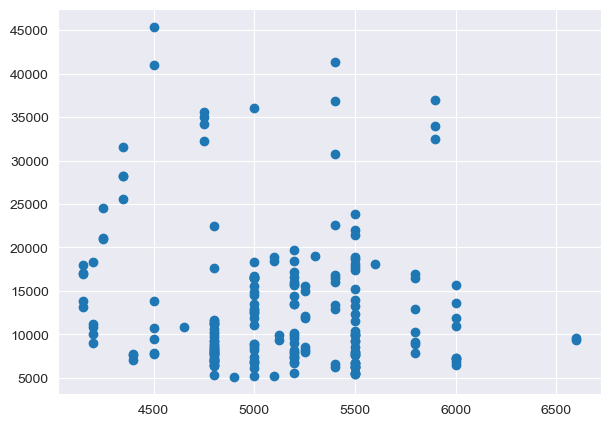

In [70]:
plt.figure(figsize=(7, 5))
plt.scatter(Z1['peak-rpm'], df['price'])
plt.show()

Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.Lets try resudual plot for remiaing values

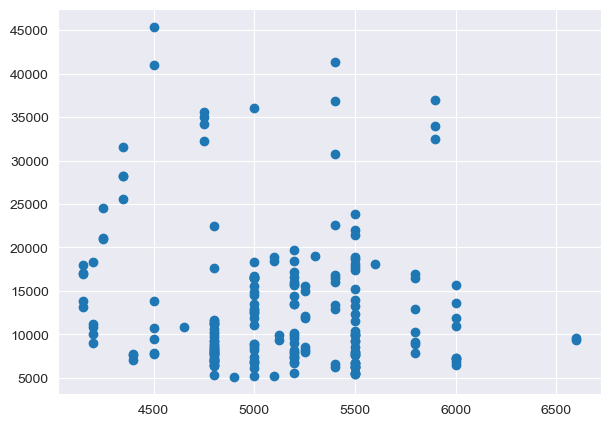

In [71]:
plt.figure(figsize=(7, 5))
plt.scatter(df['peak-rpm'], df['price'])
plt.show()

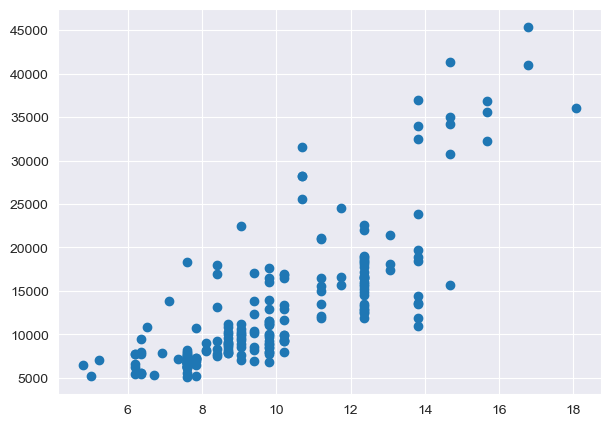

In [72]:
plt.figure(figsize=(7, 5))
plt.scatter(df['city-L/100km'], df['price'])
plt.show()

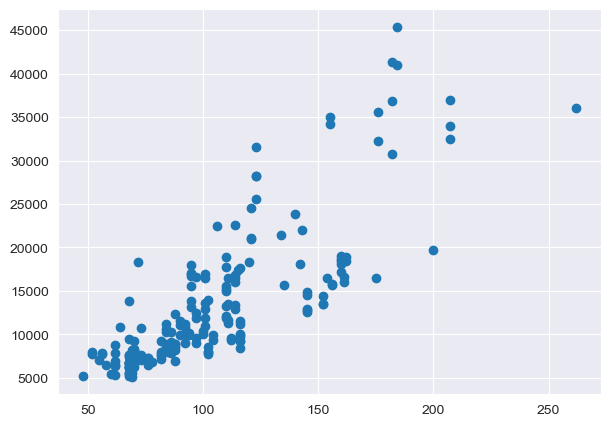

In [73]:
plt.figure(figsize=(7, 5))
plt.scatter(df['horsepower'], df['price'])
plt.show()

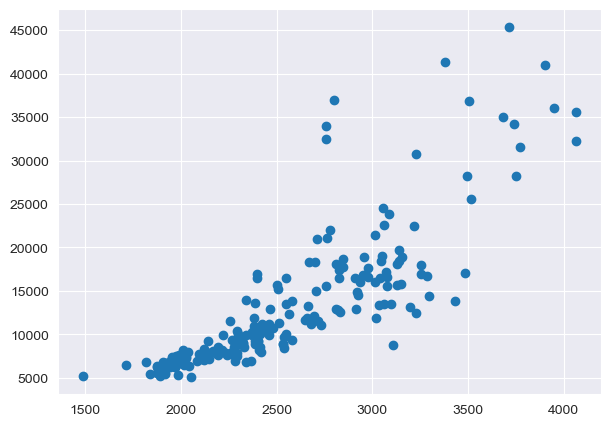

In [74]:
plt.figure(figsize=(7, 5))
plt.scatter(df['curb-weight'], df['price'])
plt.show()

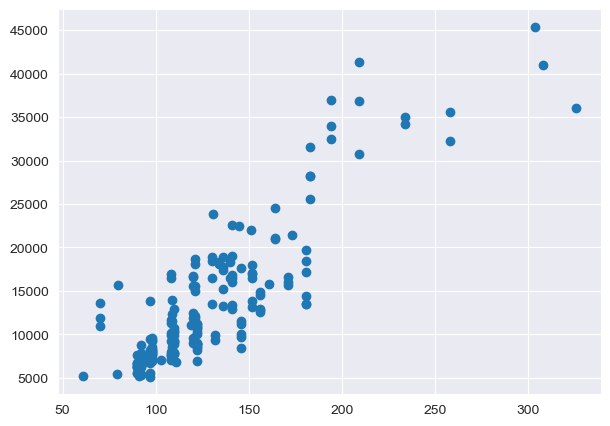

In [75]:
plt.figure(figsize=(7, 5))
plt.scatter(df['engine-size'], df['price'])
plt.show()

In [76]:
#create the linear regression object
lm_multi = LinearRegression()
lm_multi

LinearRegression()

In [77]:
lm_multi.fit(Z1, df['price'])

LinearRegression()

Lets get the coef and intercept value

In [78]:
lm_multi.coef_

array([3.75013913e-01, 5.74003541e+00, 9.17662742e+01, 3.70350151e+02,
       1.58733026e+00, 1.32242578e+03])

In [79]:
lm_multi.intercept_

-45782.763604781605

Lets predict the match

In [80]:
Y_hat = lm_multi.predict(Z1)
Y_hat

array([13548.76833369, 13548.76833369, 18349.65620071, 10462.04778866,
       17093.45921256, 15474.35898958, 17408.75092424, 18040.15481983,
       18422.7805903 , 11371.66671604, 11371.66671604, 16782.30998818,
       17098.01193598, 18391.50046289, 28147.36990933, 29008.37522149,
       30280.05458674,  2710.22365762,  5934.07768106,  6134.97892056,
        5583.87178415,  6098.47115374,  8252.9513714 ,  6620.81437645,
        6747.09515557,  6747.09515557,  8614.5736025 , 11992.62104095,
       17903.7654461 ,  6474.50452529,  6751.48692366,  4496.90009121,
        6298.79195888,  6390.63252551,  6700.59443789,  6780.95493369,
       10116.56952617, 10420.79140313, 10506.89193435, 10897.21434253,
       11023.66235828, 10152.90253148,  9155.09867202, 12489.98914328,
       36592.39698599, 36592.39698599, 45042.428185  ,  3218.64309329,
        5534.3331489 ,  5563.03332598,  5792.63474255,  5821.33491963,
       10662.6629024 , 10662.6629024 , 10691.36307947, 13424.41734269,
      

Lets get the graph between our predicted value nad actual value

/var/folders/6h/k8sl9_551p7glsyq0773p3700000gn/T/ipykernel_85243/962070405.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax_multi = sns.distplot(df['price'], hist=True, color="r", label="Actual Value")
/var/folders/6h/k8sl9_551p7glsyq0773p3700000gn/T/ipykernel_85243/962070405.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad63727

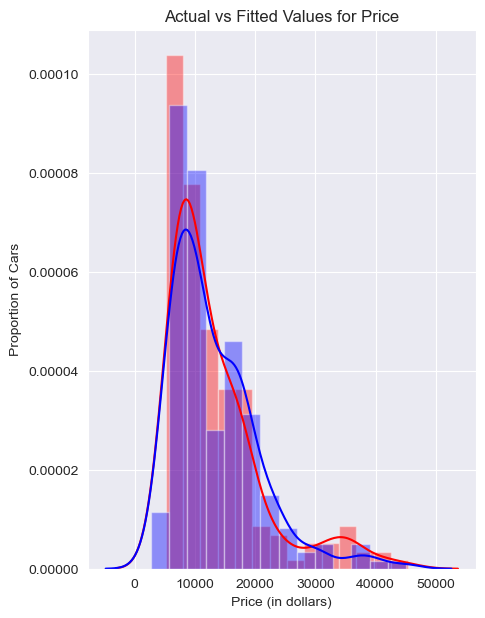

In [81]:
plt.figure(figsize=(5,7))


ax_multi = sns.distplot(df['price'], hist=True, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=True, color="b", label="Fitted Values" , ax=ax_multi)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

Lets calculuate the R square of the model

In [82]:
# fit the model 
lm_multi.fit(Z1, df['price'])
# Find the R^2
print('The R-square is: ', lm_multi.score(Z1, df['price']))

The R-square is:  0.8313349042564419


The R square value should be between 0-1 with 1 as the best fit. In our case we can say 0.8 is a good prediction.

/var/folders/6h/k8sl9_551p7glsyq0773p3700000gn/T/ipykernel_85243/1338793871.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
/var/folders/6h/k8sl9_551p7glsyq0773p3700000gn/T/ipykernel_85243/1338793871.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147

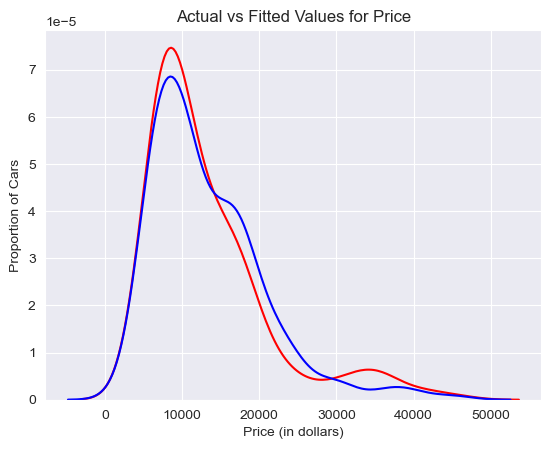

In [83]:
import seaborn as sns

ax2 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax2)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()


The above graph shows the difference between the Actual value and the predicted valiues

Lets try to evaluate the same result with Polynomial regression model.
Polynomial Regression is a form of linear regression in which the relationship between the independent variable x and dependent variable y is modeled as an nth degree polynomial.

We will use the following function to plot the data:

In [84]:
 def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()


We will assign highway-mpg as x and price as y 

In [85]:

x = df['highway-mpg']
y = df['price']

 
Let's fit the polynomial using the function polyfit, then use the function poly1d to display the polynomial function.

In [86]:
# Here we use a polynomial of the 2nd order (cubic) 
f = np.polyfit(x, y, 4)
p = np.poly1d(f)
print(p)

         4        3       2
0.02651 x - 5.17 x + 382 x - 1.267e+04 x + 1.657e+05


Let's plot the function

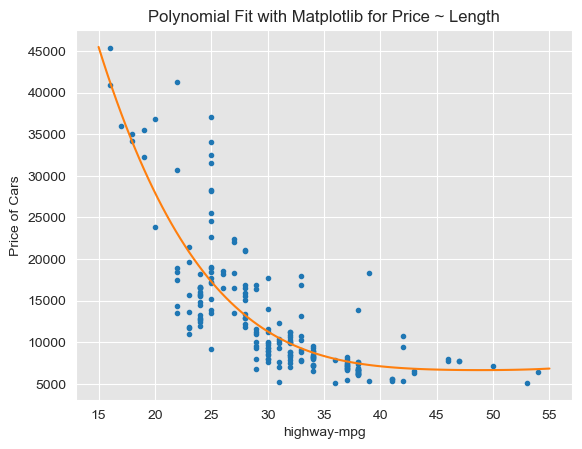

In [87]:
PlotPolly(p, x, y, 'highway-mpg')

Since we got a good corelation with horsepower lets try the same here.

        2
0.2054 x + 121 x - 1786


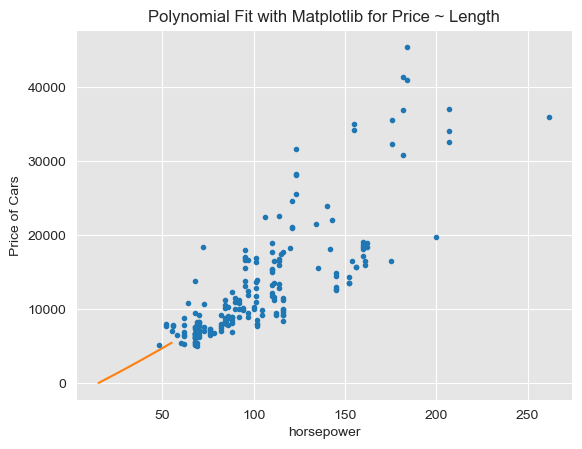

In [88]:
x1 = df['horsepower']
y1 = df['price']
f1 = np.polyfit(x1, y1, 2)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1, x1, y1, 'horsepower')

Lets calculate R2

In [89]:
from sklearn.metrics import r2_score
r_squared = r2_score(y1, p1(x1))
print('The R-square value is: ', r_squared)

The R-square value is:  0.657954007464893


The above results are not very encourging. Comparing the models so far, multivariate linear regression gives the best fit. 

If we now create multivariate polynomial regression, there is room for hope that the model will be improved.

Task: Generalize the polynomial regression to multivariate and report the resulting error metrics and the R2 score.